In [5]:

import os
os.chdir('C:\\Users\\btindol\\OneDrive - Stryker\\Linked In Learn\\Algorithmic Investing\Algorithmic Trading & Quantitative Analysis using Python')  
print(os.getcwd())  # Prints the current working directory

#####################################################################################################################################################
#imports 
#!pip install yfinance 
#!pip install pandas 
#!pip install numpy
#!pip install requests
#!pip install datetime
#!pip install yahoofinancials
!pip install stocktrends
from yahoofinancials import YahooFinancials

import pandas as pd
import numpy as np
import requests
import datetime as dt
import os
import json 
from functools import reduce
import statsmodels.api as sm
from stocktrends import Renko

import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\btindol\OneDrive - Stryker\Linked In Learn\Algorithmic Investing\Algorithmic Trading & Quantitative Analysis using Python


You should consider upgrading via the 'c:\users\btindol\anaconda3\python.exe -m pip install --upgrade pip' command.


In [6]:
# One way of getting data!!!

all_tickers =  ['AMZN','MSFT','INCT','GOOG','INFY.NS','SYK']

# Used to make a dataframe of percent change from the daily price data!!!
def get_daily_returns(df):
    daily_return = df.pct_change()
    cols = daily_return.columns.tolist()
    newcols = []
    for j in range(0,len(cols)):
        if cols[j] == "formatted_date":
            colz = cols[j]
        else:
            colz = cols[j] + "_" + "percent_change"

        newcols.append(colz)
    daily_return.columns = newcols               
    return daily_return

def get_tickers(all_tickers):
    # get multiple tickers yahoo financials wants dates to be in string
    close_prices = pd.DataFrame()
    end_date = (dt.date.today()).strftime('%Y-%m-%d')
    beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d') # 1825 is 5 years ish 
    for ticker in all_tickers:
        yahoo_financials = YahooFinancials(ticker)
        json_obj = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
        ohlv = json_obj[ticker]['prices']
        temp = pd.DataFrame(ohlv)[["formatted_date","adjclose"]] # convert list of dictionaries into dataframe  just look at this pd.DataFrame(ohlv)
        temp.set_index("formatted_date",inplace=True) # make formatted date the index (best practice to have date in index for time series data)
        temp.dropna(inplace=True) # because dividend data might hapen and it creates NAN so remove this 
        close_prices[ticker]=temp["adjclose"]
    daily_return = get_daily_returns(close_prices)
    final = close_prices.merge(daily_return, on='formatted_date', how='left')
    return final


var = get_tickers(all_tickers)
var

,AMZN,MSFT,INCT,GOOG,INFY.NS,SYK,AMZN_percent_change,MSFT_percent_change,INCT_percent_change,GOOG_percent_change,INFY.NS_percent_change,SYK_percent_change
formatted_date,,,,,,,,,,,,
2016-05-09,679.750000,45.912781,94.339622,712.900024,522.911804,104.892509,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-10,703.070007,46.783905,113.207550,723.179993,528.908203,105.297661,0.034307,0.018973,0.200000,0.014420,0.011467,0.003863
2016-05-11,713.229980,46.811417,122.641510,715.289978,524.132751,105.043259,0.014451,0.000588,0.083333,-0.010910,-0.009029,-0.002416
2016-05-12,717.929993,47.233212,122.641510,713.309998,527.687012,105.363632,0.006590,0.009011,0.000000,-0.002768,0.006781,0.003050
2016-05-13,709.919983,46.838917,103.773582,710.830017,526.487793,104.506172,-0.011157,-0.008348,-0.153846,-0.003477,-0.002273,-0.008138
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,3386.489990,251.860001,0.001100,2395.169922,1352.050049,263.100006,-0.023340,-0.001269,-0.120000,-0.006203,-0.001698,0.001790
2021-05-04,3311.870117,247.789993,0.001100,2354.250000,1329.400024,255.589996,-0.022035,-0.016160,0.000000,-0.017084,-0.016752,-0.028544
2021-05-05,3270.540039,246.470001,0.001100,2356.739990,1341.500000,253.070007,-0.012479,-0.005327,0.000000,0.001058,0.009102,-0.009859


In [7]:
cp_standardized = (var - var.mean())/var.std() # Standardization
cp_standardized

,AMZN,MSFT,INCT,GOOG,INFY.NS,SYK,AMZN_percent_change,MSFT_percent_change,INCT_percent_change,GOOG_percent_change,INFY.NS_percent_change,SYK_percent_change
formatted_date,,,,,,,,,,,,
2016-05-09,-1.314165,-1.271571,7.302190,-1.336253,-0.584018,-1.589399,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-10,-1.285245,-1.256721,8.791705,-1.307099,-0.560394,-1.579328,1.794406,1.011149,0.258956,0.793067,0.599891,0.168432
2016-05-11,-1.272646,-1.256252,9.536463,-1.329475,-0.579208,-1.585652,0.710944,-0.053079,0.067640,-0.715752,-0.564902,-0.184295
2016-05-12,-1.266817,-1.249062,9.536463,-1.335091,-0.565205,-1.577688,0.281992,0.434450,-0.069014,-0.230759,0.333582,0.122780
2016-05-13,-1.276751,-1.255783,8.046947,-1.342124,-0.569930,-1.599003,-0.686388,-0.570327,-0.321298,-0.272970,-0.180944,-0.505759
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,2.042529,2.239093,-0.145300,3.434672,2.682559,2.343320,-1.351170,-0.160568,-0.265795,-0.435369,-0.148300,0.051975
2021-05-04,1.949991,2.169714,-0.145300,3.318622,2.593324,2.156637,-1.279932,-1.022518,-0.069014,-1.083526,-1.003824,-1.652173
2021-05-05,1.898737,2.147213,-0.145300,3.325684,2.640995,2.093995,-0.758540,-0.395471,-0.069014,-0.002874,0.465461,-0.602467


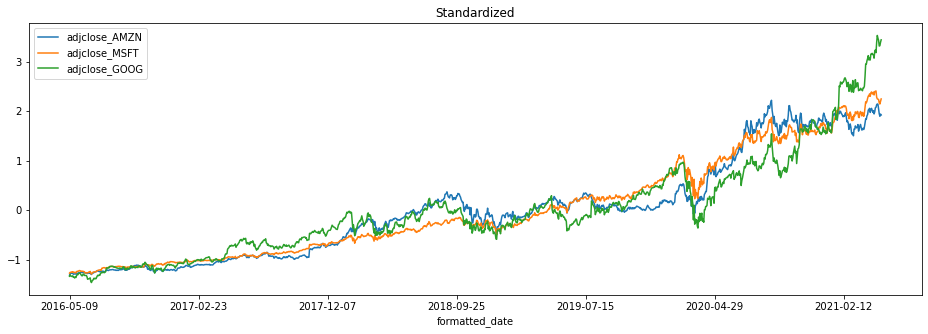

In [10]:
# Compare stocks standardized... 
cp_standardized['AMZN'].plot(label='adjclose_AMZN',figsize=(16,5),title='Standardized')
cp_standardized['MSFT'].plot(label='adjclose_MSFT')
cp_standardized['GOOG'].plot(label='adjclose_GOOG')

plt.legend()

In [11]:
# Another way of getting all the data
list_of_stocks = ['AMZN','MSFT','INCT','GOOG','INFY.NS','SYK']

def get_ticker_data(list_of_stocks):
    list_of_dataframes = []
    for i in range(0,len(list_of_stocks)):
        #print(list_of_stocks[i])
        yahoo_financials = YahooFinancials(list_of_stocks[i])
        end_date = (dt.date.today()).strftime('%Y-%m-%d')
        beg_date = (dt.date.today()-dt.timedelta(1825)).strftime('%Y-%m-%d') # 1825 is 5 years ish 
        api_dictionary_data = yahoo_financials.get_historical_price_data(beg_date,end_date,"daily")
        dict_to_json = json.dumps(api_dictionary_data) # converts dictionary into json string not subsettable
        json_from_dict= json.loads(dict_to_json)      # convert dict to jason
        df = pd.json_normalize(json_from_dict[list_of_stocks[i]]['prices']) # subset the prices part of the dictionaries 
        df = pd.DataFrame(df)
        #df = df[['formatted_date','adjclose']]
        df['high'] =df['high'].round(decimals=2)# rounding columns off 
        df['low']=df['low'].round(decimals=2)
        df['open']= df['open'].round(decimals=2)
        df['close']=df['close'].round(decimals=2)
        df['volume']= df['volume'].round(decimals=2)
        df['adjclose']=df['adjclose'].round(decimals=2)
        df["percent_change"] = round(df["adjclose"].pct_change(1),4)
        cols = df.columns.tolist()

        # Rename the columns to paste the name of the ticker to the column name to know which one its from 
        newcols = []
        for j in range(0,len(cols)):
            if cols[j] == "formatted_date":
                colz = cols[j]
            else:
                colz = cols[j] + "_" + list_of_stocks[i]
           
            newcols.append(colz)
        df.columns = newcols                         # replace old column to noew

        list_of_dataframes.append(df)
    
    # This takes all the dataframes made from the tickers and takes the only column not mreged from them aka formatted date and left joins them all 
    varz = reduce(lambda x, y: pd.merge(x, y, on = 'formatted_date'), list_of_dataframes)
    varz.set_index("formatted_date",inplace=True)
    return varz

In [12]:
var = get_ticker_data(list_of_stocks)
var

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,date_MSFT,high_MSFT,...,adjclose_INFY.NS,percent_change_INFY.NS,date_SYK,high_SYK,low_SYK,open_SYK,close_SYK,volume_SYK,adjclose_SYK,percent_change_SYK
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN,1462800600,50.59,...,522.91,NaN,1462800600,112.23,111.12,111.13,111.32,960600,104.89,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343,1462887000,51.10,...,528.91,0.0115,1462887000,111.91,111.11,111.38,111.75,1669900,105.30,0.0039
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145,1462973400,51.78,...,524.13,-0.0090,1462973400,112.37,111.37,111.81,111.48,1439900,105.04,-0.0025
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066,1463059800,51.81,...,527.69,0.0068,1463059800,112.31,110.85,111.52,111.82,1048200,105.36,0.0030
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112,1463146200,51.90,...,526.49,-0.0023,1463146200,112.01,110.41,111.91,110.91,1050700,104.51,-0.0081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,1620048600,254.35,...,1352.05,-0.0017,1620048600,264.36,262.29,263.53,263.10,1032800,263.10,0.0018
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220,1620135000,251.21,...,1329.40,-0.0168,1620135000,261.42,253.24,261.42,255.59,1563500,255.59,-0.0285
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125,1620221400,249.50,...,1341.50,0.0091,1620221400,256.70,251.70,256.70,253.07,1043900,253.07,-0.0099


# One Stock Analysis Make One Big Function At End

In [13]:
list_of_stocks = ['AMZN']

df = get_ticker_data(list_of_stocks)
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN
formatted_date,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112
...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125


# Indicators

In [14]:
# Get moving average of price
df['MA_5_Day'] = df['adjclose_AMZN'].rolling(window=5).mean() # 5 day price moving average
df['MA_30_Day'] = df['adjclose_AMZN'].rolling(window=30).mean() # 30 day price moving average
df['MA_90_Day'] = df['adjclose_AMZN'].rolling(window=90).mean() # 90 day price moving average

# Exponentially weighted moving average
df['EWA_5_Day'] = df['adjclose_AMZN'].ewm(span=5,min_periods=5).mean() # 5 day price moving average
df['EWA_30_Day'] = df['adjclose_AMZN'].ewm(span=30,min_periods=30).mean() # 30 day price moving average
df['EWA_90_Day'] = df['adjclose_AMZN'].ewm(span=90,min_periods=90).mean() # 90 day price moving average

# Moving standard deviation
df['std_5_Day'] = df['adjclose_AMZN'].rolling(window=5).std() # 5 day price moving average
df['std_30_Day'] = df['adjclose_AMZN'].rolling(window=30).std() # 30 day price moving average
df['std_90_Day'] = df['adjclose_AMZN'].rolling(window=90).std() # 90 day price moving average

# Making confidence range 2 times std
df['std_30_Day_Upper'] =df['MA_5_Day'] + df['std_30_Day'] # 5 day std upper limmit
df['std_30_Day_Lower'] =df['MA_5_Day'] - df['std_30_Day'] # 5 day std lower limit
df['std_30_Day_Upper_2'] =df['MA_5_Day'] + (df['std_30_Day'] *2) # 5 day std upper limmit
df['std_30_Day_Lower_2'] =df['MA_5_Day'] - (df['std_30_Day']*2) # 5 day std lower limit

# get percent change moving average
df['MA_5_Day_pct_chg'] = df['percent_change_AMZN'].rolling(window=5).mean() # 5 day percent change (one week )
df['MA_30_Day_pct_chg'] = df['percent_change_AMZN'].rolling(window=30).mean() # 30 day percent change moving average
df['MA_90_Day_pct_chg'] = df['percent_change_AMZN'].rolling(window=90).mean() # 90 day percent change moving average


In [15]:
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,std_5_Day,std_30_Day,std_90_Day,std_30_Day_Upper,std_30_Day_Lower,std_30_Day_Upper_2,std_30_Day_Lower_2,MA_5_Day_pct_chg,MA_30_Day_pct_chg,MA_90_Day_pct_chg
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112,704.780,NaN,...,15.001413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,36.901501,140.548144,126.042551,3580.778144,3299.681856,3721.326289,3159.133711,-0.00124,0.003300,0.000734
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220,3419.118,3288.066000,...,69.236461,136.883358,126.396297,3556.001358,3282.234642,3692.884715,3145.351285,-0.00614,0.002177,0.000489
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125,3381.526,3292.500667,...,90.323637,133.961086,126.437004,3515.487086,3247.564914,3649.448173,3113.603827,-0.01104,0.001473,0.000423


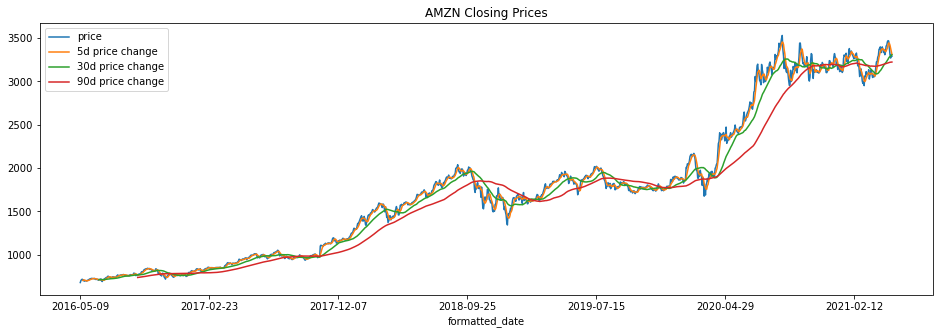

In [16]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

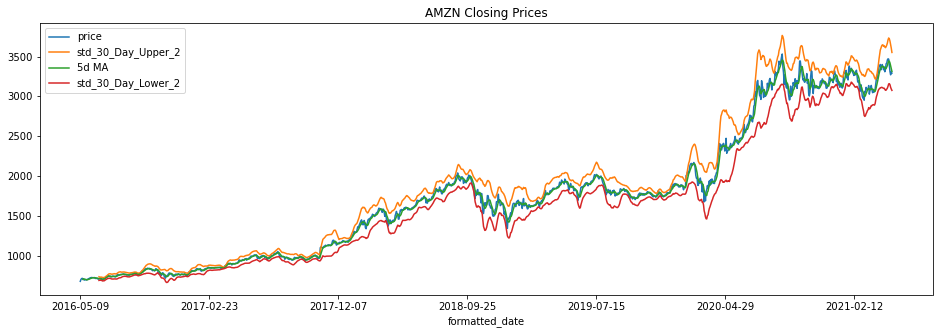

In [17]:
# Moving standard deviation averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
#df['std_30_Day_Upper'].plot(label='std_30_Day_Upper')
df['std_30_Day_Upper_2'].plot(label='std_30_Day_Upper_2')
df['MA_5_Day'].plot(label='5d MA')
#df['std_30_Day_Lower'].plot(label='std_30_Day_Lower')
df['std_30_Day_Lower_2'].plot(label='std_30_Day_Lower_2')


plt.legend()

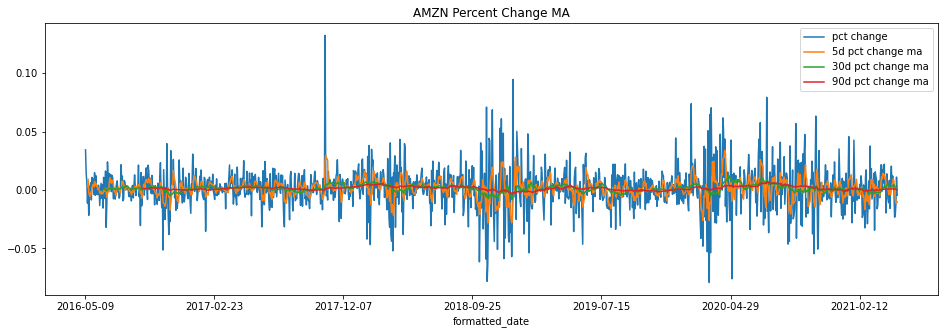

In [18]:
# Look into percent change volitility?? 
# Look into volume?? 
df['percent_change_AMZN'].plot(label='pct change',figsize=(16,5),title='AMZN Percent Change MA')
df['MA_5_Day_pct_chg'].plot(label='5d pct change ma')
df['MA_30_Day_pct_chg'].plot(label='30d pct change ma')
df['MA_90_Day_pct_chg'].plot(label='90d pct change ma')
plt.legend()

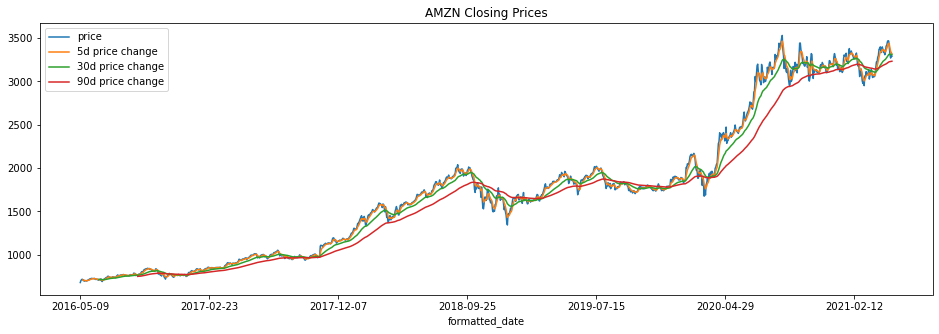

In [19]:
# exponential weighted moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['EWA_5_Day'].plot(label='5d price change')
df['EWA_30_Day'].plot(label='30d price change')
df['EWA_90_Day'].plot(label='90d price change')
plt.legend()

In [20]:
# mRSI 

# What Is the Relative Strength Index (RSI)?
# The relative strength index (RSI) is a momentum indicator used in technical analysis that
#measures the magnitude of recent price changes to evaluate overbought or oversold conditions in
#the price of a stock or other asset. 
#The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a
#reading from 0 to 100. The indicator was originally developed by J. Welles Wilder Jr. and introduced in his seminal 1978 book,
#"New Concepts in Technical Trading Systems."
# Traditional interpretation and usage of the RSI are that values of 70 or above indicate that a security is becoming overbought
#or overvalued and may be primed for a trend reversal or corrective pullback in price. An RSI reading of 30 or below indicates
#an oversold or undervalued condition.

In [21]:
# Calculating RSI without using loop
def rsi(df, n):
    "function to calculate RSI"
    delta = df.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[n-1]] = np.mean( u[:n]) # first value is average of gains
    u = u.drop(u.index[:(n-1)])
    d[d.index[n-1]] = np.mean( d[:n]) # first value is average of losses
    d = d.drop(d.index[:(n-1)])
    rs = u.ewm(com=n,min_periods=n).mean()/d.ewm(com=n,min_periods=n).mean()
    return 100 - 100 / (1+rs)

#rsi(ohlcv["Adj Close"],14)

In [22]:
df["RSI_AMZN_15"] = rsi(df["adjclose_AMZN"],15)
df["RSI_AMZN_30"] = rsi(df["adjclose_AMZN"],30)

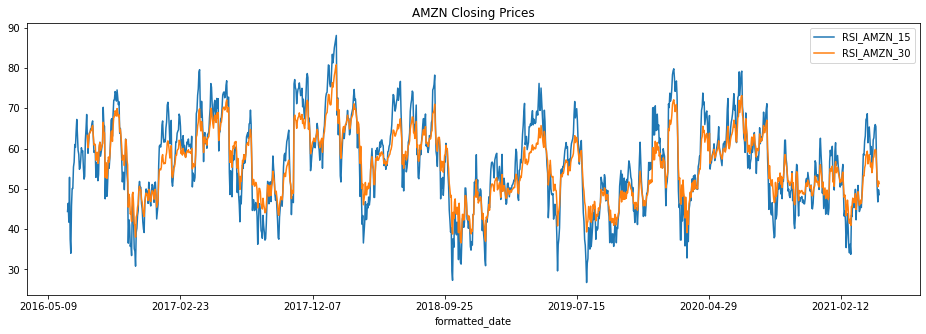

In [23]:
# exponential weighted moving averages
# Make confidence intervalse for the RSI

df['RSI_AMZN_15'].plot(label='RSI_AMZN_15',figsize=(16,5),title='AMZN Closing Prices')
df['RSI_AMZN_30'].plot(label='RSI_AMZN_30')
#df['RSI_AMZN_15'].plot(label='RSI_AMZN_15')
plt.legend()

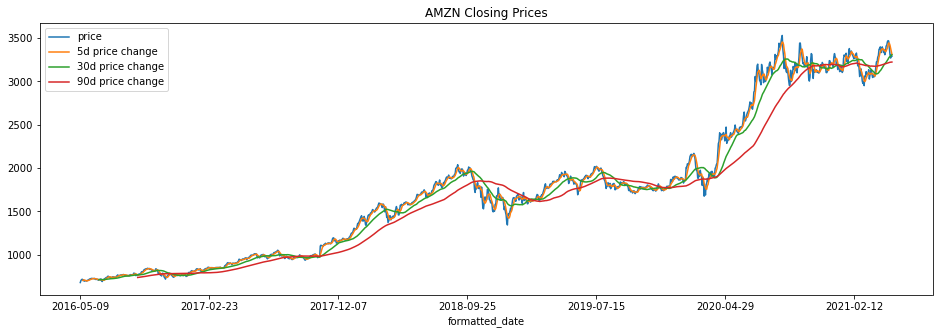

In [24]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

In [25]:
# ATR Average true range
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#  To measure recent volatility, use a shorter average, such as 2 to 10 periods. For longer-term volatility, use 20 to 50 periods.
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#https://www.fidelity.com/learning-center/trading-investing/technical-analysis/technical-indicator-guide/atr
#Average True Range (ATR) is the average of true ranges over the specified period.
#ATR measures volatility, taking into account any gaps in the price movement. 
#Typically, the ATR calculation is based on 14 periods, which can be intraday, daily, weekly, or monthly. 
#To measure recent volatility, use a shorter average, such as 2 to 10 periods. 
#For longer-term volatility, use 20 to 50 periods.

# This function can be onlyu used on a dataframe of one stock at a time otherwise it will grab multiple high_ticker columns

def ATR(df,n):
    "function to calculate True Range and Average True Range"
    highcol = [col for col in df.columns if 'high' in col] # grab the column name that contains high
    lowcol = [col for col in df.columns if 'low' in col]
    adjclosecol = [col for col in df.columns if 'adjclose' in col]
    df['High']= df[highcol] # paste that name make a new column that fites the function that the course allowed
    df['Low'] = df[lowcol]
    df['Adj Close'] = df[adjclosecol]
    df = df.copy()
    df['H-L']=abs(df['High']-df['Low'])
    df['H-PC']=abs(df['High']-df['Adj Close'].shift(1))
    df['L-PC']=abs(df['Low']-df['Adj Close'].shift(1))
    df['TR']=df[['H-L','H-PC','L-PC']].max(axis=1,skipna=False)
    #df['ATR'] = df['TR'].rolling(n).mean()
    df['ATR'] = df['TR'].ewm(span=n,adjust=False,min_periods=n).mean() # 14 periods exponential weighted moving average to measure longer volitility use 90 day
    df2 = df.drop(['H-L','H-PC','L-PC'],axis=1)
    return df2

df = ATR(df,14)
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,MA_5_Day_pct_chg,MA_30_Day_pct_chg,MA_90_Day_pct_chg,RSI_AMZN_15,RSI_AMZN_30,High,Low,Adj Close,TR,ATR
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,686.98,671.41,679.75,NaN,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,704.55,693.50,703.07,24.80,NaN
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,719.00,701.65,713.23,17.35,NaN
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,722.45,711.51,717.93,10.94,NaN
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112,704.780,NaN,...,NaN,NaN,NaN,NaN,NaN,719.25,706.51,709.92,12.74,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,-0.00124,0.003300,0.000734,56.637977,55.582274,3486.65,3372.70,3386.49,113.95,78.613413
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220,3419.118,3288.066000,...,-0.00614,0.002177,0.000489,49.996850,52.239719,3367.98,3272.13,3311.87,114.36,83.379625
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125,3381.526,3292.500667,...,-0.01104,0.001473,0.000423,46.757735,50.501529,3354.70,3264.36,3270.54,90.34,84.307675


In [26]:
# ADX AVERAGE DIRECTIONAL MOVEMENT
#https://www.investopedia.com/articles/trading/07/adx-trend-indicator.asp
# ADX values help traders identify the strongest and most profitable trends to trade. 
#The values are also important for distinguishing between trending and non-trending conditions. 
#Many traders will use ADX readings above 25 to suggest that the trend is strong enough for trend-trading strategies. 
#Conversely, when ADX is below 25, many will avoid trend-trading strategies.


# ADX Value	Trend Strength
# 0-25	Absent or Weak Trend
# 25-50	Strong Trend
# 50-75	Very Strong Trend
# 75-100	Extremely Strong Trend

In [27]:

def ADX(DF,n):
    "function to calculate ADX"
    df2 = DF.copy()
    df2['TR'] = ATR(df2,n)['TR'] #the period parameter of ATR function does not matter because period does not influence TR calculation
    df2['DMplus']=np.where((df2['High']-df2['High'].shift(1))>(df2['Low'].shift(1)-df2['Low']),df2['High']-df2['High'].shift(1),0)
    df2['DMplus']=np.where(df2['DMplus']<0,0,df2['DMplus'])
    df2['DMminus']=np.where((df2['Low'].shift(1)-df2['Low'])>(df2['High']-df2['High'].shift(1)),df2['Low'].shift(1)-df2['Low'],0)
    df2['DMminus']=np.where(df2['DMminus']<0,0,df2['DMminus'])
    TRn = []
    DMplusN = []
    DMminusN = []
    TR = df2['TR'].tolist()
    DMplus = df2['DMplus'].tolist()
    DMminus = df2['DMminus'].tolist()
    for i in range(len(df2)):
        if i < n:
            TRn.append(np.NaN)
            DMplusN.append(np.NaN)
            DMminusN.append(np.NaN)
        elif i == n:
            TRn.append(df2['TR'].rolling(n).sum().tolist()[n])
            DMplusN.append(df2['DMplus'].rolling(n).sum().tolist()[n])
            DMminusN.append(df2['DMminus'].rolling(n).sum().tolist()[n])
        elif i > n:
            TRn.append(TRn[i-1] - (TRn[i-1]/n) + TR[i])
            DMplusN.append(DMplusN[i-1] - (DMplusN[i-1]/n) + DMplus[i])
            DMminusN.append(DMminusN[i-1] - (DMminusN[i-1]/n) + DMminus[i])
    df2['TRn'] = np.array(TRn)
    df2['DMplusN'] = np.array(DMplusN)
    df2['DMminusN'] = np.array(DMminusN)
    df2['DIplusN']=100*(df2['DMplusN']/df2['TRn'])
    df2['DIminusN']=100*(df2['DMminusN']/df2['TRn'])
    df2['DIdiff']=abs(df2['DIplusN']-df2['DIminusN'])
    df2['DIsum']=df2['DIplusN']+df2['DIminusN']
    df2['DX']=100*(df2['DIdiff']/df2['DIsum'])
    ADX = []
    DX = df2['DX'].tolist()
    for j in range(len(df2)):
        if j < 2*n-1:
            ADX.append(np.NaN)
        elif j == 2*n-1:
            ADX.append(df2['DX'][j-n+1:j+1].mean())
        elif j > 2*n-1:
            ADX.append(((n-1)*ADX[j-1] + DX[j])/n)
    df2['ADX']=np.array(ADX)
    return df2['ADX']

df['ADX'] = ADX(df,14)
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,MA_30_Day_pct_chg,MA_90_Day_pct_chg,RSI_AMZN_15,RSI_AMZN_30,High,Low,Adj Close,TR,ATR,ADX
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-05-09,1462800600,686.98,671.41,673.95,679.75,3982200,679.75,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,686.98,671.41,679.75,NaN,NaN,NaN
2016-05-10,1462887000,704.55,693.50,694.00,703.07,6105600,703.07,0.0343,NaN,NaN,...,NaN,NaN,NaN,NaN,704.55,693.50,703.07,24.80,NaN,NaN
2016-05-11,1462973400,719.00,701.65,705.79,713.23,7338200,713.23,0.0145,NaN,NaN,...,NaN,NaN,NaN,NaN,719.00,701.65,713.23,17.35,NaN,NaN
2016-05-12,1463059800,722.45,711.51,717.38,717.93,5048200,717.93,0.0066,NaN,NaN,...,NaN,NaN,NaN,NaN,722.45,711.51,717.93,10.94,NaN,NaN
2016-05-13,1463146200,719.25,706.51,714.64,709.92,4763400,709.92,-0.0112,704.780,NaN,...,NaN,NaN,NaN,NaN,719.25,706.51,709.92,12.74,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,0.003300,0.000734,56.637977,55.582274,3486.65,3372.70,3386.49,113.95,78.613413,28.250460
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220,3419.118,3288.066000,...,0.002177,0.000489,49.996850,52.239719,3367.98,3272.13,3311.87,114.36,83.379625,26.243069
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125,3381.526,3292.500667,...,0.001473,0.000423,46.757735,50.501529,3354.70,3264.36,3270.54,90.34,84.307675,24.483566


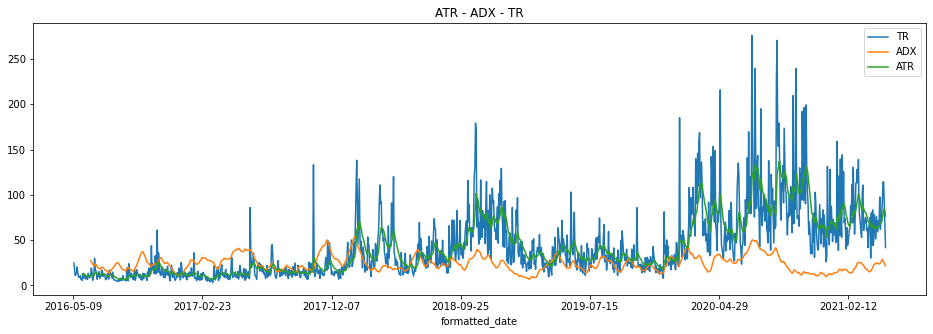

In [28]:
# Visualizing adx, atr, tr together
# Regular moving averages
df['TR'].plot(label='TR',figsize=(16,5),title='ATR - ADX - TR')
df['ADX'].plot(label='ADX')
df['ATR'].plot(label='ATR')
plt.legend()

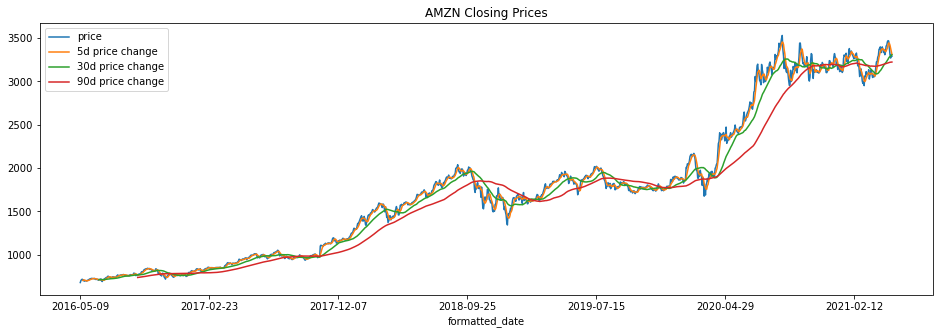

In [29]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

In [30]:
# Moving average convergence and divergence
#The Formula for MACD Is:
#MACD=12-Period EMA − 26-Period EMA

# KEY TAKEAWAYS
# Moving average convergence divergence (MACD) is calculated by subtracting the 26-period exponential moving average (EMA) from the 12-period EMA.
# MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
# The speed of crossovers is also taken as a signal of a market is overbought or oversold.
# MACD helps investors understand whether the bullish or bearish movement in the price is strengthening or weakening.

def MACD(DF,a,b,c):
    """function to calculate MACD
       typical values a = 12; b =26, c =9"""
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    DF['Adj Close'] = DF[adjclosecol]
    df = DF.copy()
    df["MA_Fast"]=df["Adj Close"].ewm(span=a,min_periods=a).mean()
    df["MA_Slow"]=df["Adj Close"].ewm(span=b,min_periods=b).mean()
    df["MACD"]=df["MA_Fast"]-df["MA_Slow"]
    df["Signal"]=df["MACD"].ewm(span=c,min_periods=c).mean()
    df.dropna(inplace=True)
    return df

df = MACD(df, 12, 26, 9)  # 9 is the number of periods for the exponenetial moving average
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,High,Low,Adj Close,TR,ATR,ADX,MA_Fast,MA_Slow,MACD,Signal
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-09-15,1473946200,770.87,757.58,762.00,769.69,3034000,769.69,0.0113,764.684,767.741000,...,770.87,757.58,769.69,13.29,10.975423,16.669044,769.026928,766.196285,2.830643,4.583933
2016-09-16,1474032600,780.46,771.66,773.28,778.52,5499200,778.52,0.0115,768.360,768.332667,...,780.46,771.66,778.52,10.77,10.948033,16.150476,770.487401,767.109922,3.377479,4.342642
2016-09-19,1474291800,781.94,771.00,779.97,775.10,2297200,775.10,-0.0044,769.082,768.636667,...,781.94,771.00,775.10,10.94,10.946962,15.816928,771.197032,767.702241,3.494791,4.173072
2016-09-20,1474378200,781.37,776.00,776.00,780.22,1937200,780.22,0.0066,772.924,769.092000,...,781.37,776.00,780.22,6.27,10.323367,15.507204,772.585181,768.630152,3.955029,4.129463
2016-09-21,1474464600,790.69,779.01,783.25,789.74,2718600,789.74,0.0122,778.654,769.806333,...,790.69,779.01,789.74,11.68,10.504251,16.124495,775.224384,770.194889,5.029495,4.309470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,3486.65,3372.70,3386.49,113.95,78.613413,28.250460,3394.392614,3329.059587,65.333027,64.610421
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220,3419.118,3288.066000,...,3367.98,3272.13,3311.87,114.36,83.379625,26.243069,3381.696827,3327.786284,53.910543,62.470445
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125,3381.526,3292.500667,...,3354.70,3264.36,3270.54,90.34,84.307675,24.483566,3364.595777,3323.545819,41.049958,58.186348


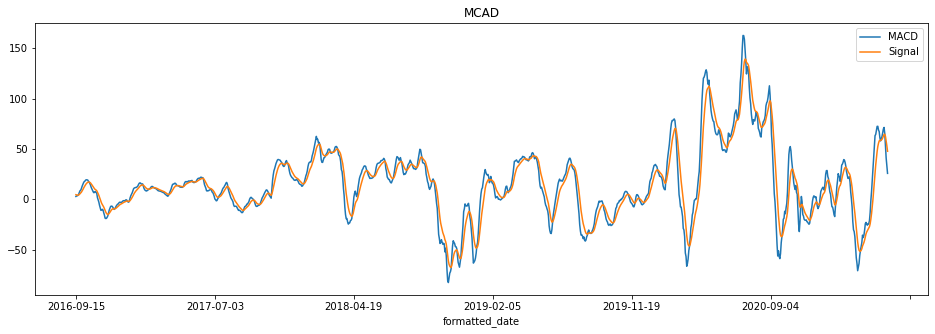

In [31]:
#MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
df['MACD'].plot(label='MACD',figsize=(16,5),title='MCAD')
df['Signal'].plot(label='Signal')

plt.legend()

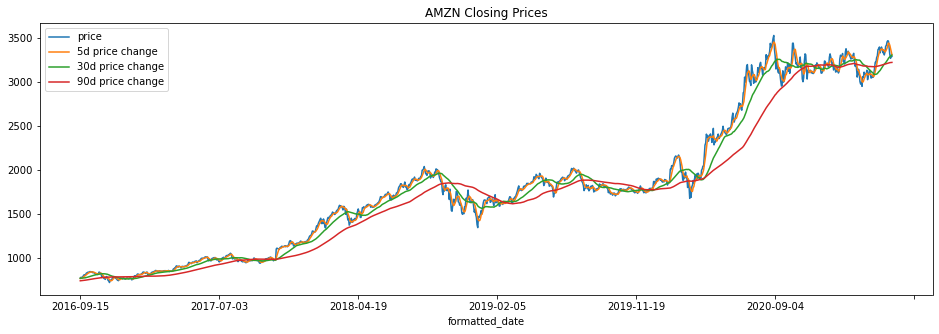

In [32]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

In [33]:
# OBV On Balance Volume (OBV) measures buying and selling pressure as a cumulative indicator that adds volume on up days and
#subtracts volume on down days. When the security closes higher than the previous close, all of the day's volume is considered 
#up-volume.

# KEY TAKEAWAYS
# On-balance volume (OBV) is a technical indicator of momentum, using volume changes to make price predictions.
# OBV shows crowd sentiment that can predict a bullish or bearish outcome.
# Comparing relative action between price bars and OBV generates more actionable signals than the green or red volume histograms commonly found at the bottom of price charts. 



def OBV(DF):
    """function to calculate On Balance Volume"""
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    volumecol = [col for col in DF.columns if 'volume' in col]
    DF['Adj Close'] = DF[adjclosecol]
    DF['Volume'] = DF[volumecol]
    df = DF.copy()
    df['daily_ret'] = df['Adj Close'].pct_change()
    df['direction'] = np.where(df['daily_ret']>=0,1,-1)
    df['direction'][0] = 0 # because first percent change so in direction first value will be na when comparing so need to make it 0 
    df['vol_adj'] = df['Volume'] * df['direction']
    df['obv'] = df['vol_adj'].cumsum()
    return df['obv']

df['On Balance Volume'] = OBV(df)
df #2465200

<ipython-input-33-a5c7482de95a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['direction'][0] = 0 # because first percent change so in direction first value will be na when comparing so need to make it 0


,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,Adj Close,TR,ATR,ADX,MA_Fast,MA_Slow,MACD,Signal,Volume,On Balance Volume
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-09-15,1473946200,770.87,757.58,762.00,769.69,3034000,769.69,0.0113,764.684,767.741000,...,769.69,13.29,10.975423,16.669044,769.026928,766.196285,2.830643,4.583933,3034000,0
2016-09-16,1474032600,780.46,771.66,773.28,778.52,5499200,778.52,0.0115,768.360,768.332667,...,778.52,10.77,10.948033,16.150476,770.487401,767.109922,3.377479,4.342642,5499200,5499200
2016-09-19,1474291800,781.94,771.00,779.97,775.10,2297200,775.10,-0.0044,769.082,768.636667,...,775.10,10.94,10.946962,15.816928,771.197032,767.702241,3.494791,4.173072,2297200,3202000
2016-09-20,1474378200,781.37,776.00,776.00,780.22,1937200,780.22,0.0066,772.924,769.092000,...,780.22,6.27,10.323367,15.507204,772.585181,768.630152,3.955029,4.129463,1937200,5139200
2016-09-21,1474464600,790.69,779.01,783.25,789.74,2718600,789.74,0.0122,778.654,769.806333,...,789.74,11.68,10.504251,16.124495,775.224384,770.194889,5.029495,4.309470,2718600,7857800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,3386.49,113.95,78.613413,28.250460,3394.392614,3329.059587,65.333027,64.610421,5875500,371606100
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220,3419.118,3288.066000,...,3311.87,114.36,83.379625,26.243069,3381.696827,3327.786284,53.910543,62.470445,5439400,366166700
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125,3381.526,3292.500667,...,3270.54,90.34,84.307675,24.483566,3364.595777,3323.545819,41.049958,58.186348,3711300,362455400


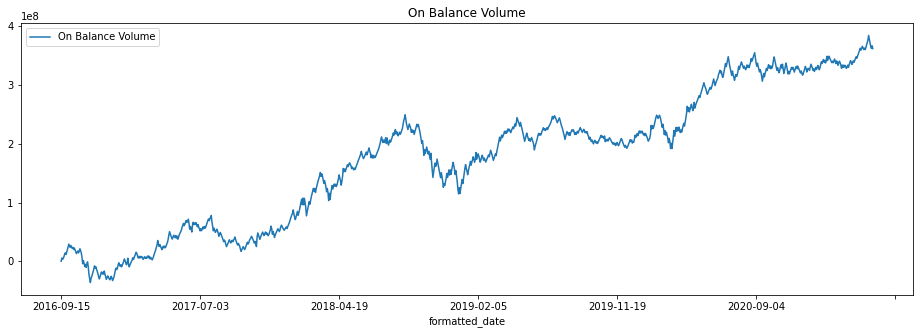

In [34]:
#MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line.
df['On Balance Volume'].plot(label='On Balance Volume',figsize=(16,5),title='On Balance Volume')
#df['Volume'].plot(label='Volume')

plt.legend()

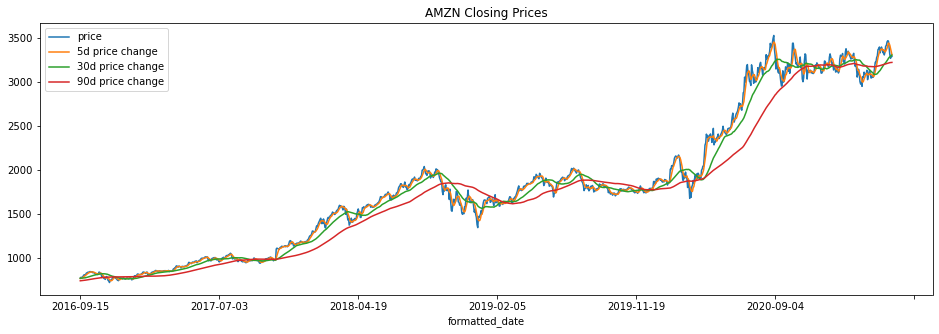

In [35]:
# Regular moving averages
df['adjclose_AMZN'].plot(label='price',figsize=(16,5),title='AMZN Closing Prices')
df['MA_5_Day'].plot(label='5d price change')
df['MA_30_Day'].plot(label='30d price change')
df['MA_90_Day'].plot(label='90d price change')

plt.legend()

In [36]:
# SLOPE 

"""
def slope(ser,n):
    '''function to calculate the slope of line connecting a point with n-previous point
     slope assumes a frame with 22 units in the x axis and span of min to max in y axis'''
    y_span = ser.max() - ser.min()
    x_span = 22
    slopes = [i*0 for i in range(n-1)]
    for i in range(n-1,len(ser)):
        y2 = ser[i]
        y1 = ser[i-n+1]
        slope = ((y2-y1)/y_span)/(n/x_span)
        slopes.append(slope)
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

"""

# LOOK INTO THIS FUNCTION BREAK IT DOWN 
def slope(ser,n):
    "function to calculate the slope of regression line for n consecutive points on a plot"
    ser = (ser - ser.min())/(ser.max() - ser.min())
    x = np.array(range(len(ser)))
    x = (x - x.min())/(x.max() - x.min())
    slopes = [i*0 for i in range(n-1)]
    for i in range(n,len(ser)+1): # from 5 to the length of the column +1
        y_scaled = ser[i-n:i]       # for each row minus 5: that row your on
        x_scaled = x[:n]            # get the stardardized version of the range of that 
        x_scaled = sm.add_constant(x_scaled)
        model = sm.OLS(y_scaled,x_scaled)
        results = model.fit()
        slopes.append(results.params[-1])
    slope_angle = (np.rad2deg(np.arctan(np.array(slopes))))
    return np.array(slope_angle)

df["close_slope"] = slope(df["adjclose_AMZN"],5) # This gives you the slope of the last 5 points 
df


,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,TR,ATR,ADX,MA_Fast,MA_Slow,MACD,Signal,Volume,On Balance Volume,close_slope
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-09-15,1473946200,770.87,757.58,762.00,769.69,3034000,769.69,0.0113,764.684,767.741000,...,13.29,10.975423,16.669044,769.026928,766.196285,2.830643,4.583933,3034000,0,0.000000
2016-09-16,1474032600,780.46,771.66,773.28,778.52,5499200,778.52,0.0115,768.360,768.332667,...,10.77,10.948033,16.150476,770.487401,767.109922,3.377479,4.342642,5499200,5499200,0.000000
2016-09-19,1474291800,781.94,771.00,779.97,775.10,2297200,775.10,-0.0044,769.082,768.636667,...,10.94,10.946962,15.816928,771.197032,767.702241,3.494791,4.173072,2297200,3202000,0.000000
2016-09-20,1474378200,781.37,776.00,776.00,780.22,1937200,780.22,0.0066,772.924,769.092000,...,6.27,10.323367,15.507204,772.585181,768.630152,3.955029,4.129463,1937200,5139200,0.000000
2016-09-21,1474464600,790.69,779.01,783.25,789.74,2718600,789.74,0.0122,778.654,769.806333,...,11.68,10.504251,16.124495,775.224384,770.194889,5.029495,4.309470,2718600,7857800,60.056209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,113.95,78.613413,28.250460,3394.392614,3329.059587,65.333027,64.610421,5875500,371606100,-65.550784
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220,3419.118,3288.066000,...,114.36,83.379625,26.243069,3381.696827,3327.786284,53.910543,62.470445,5439400,366166700,-86.355953
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125,3381.526,3292.500667,...,90.34,84.307675,24.483566,3364.595777,3323.545819,41.049958,58.186348,3711300,362455400,-87.525097


In [161]:
# RENKO 
# Tells you if it is a positive trend or a negative trnd 
# RENKO BAR GREATER OR EQUAN TO 2 IS STRONG BUY DO THREE THOUGH 
# ALSO TAKE 5 DAY OBV SLOPE  OF 30% OR GREATER 
# IF RENKO BAR IS LESS THAN 2 EXIT 
def renko_DF(DF):
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    volumecol = [col for col in DF.columns if 'volume' in col]
    opencol = [col for col in DF.columns if 'open' in col]
    datecol = [col for col in DF.columns if 'date' in col]
    highcol = [col for col in DF.columns if 'high' in col]
    lowcol = [col for col in DF.columns if 'low' in col]
    DF['Adj Close'] = DF[adjclosecol]
    DF['Volume'] = DF[volumecol]
    DF['Date'] = DF[datecol]
    DF['Open'] = DF[opencol]
    DF['High'] = DF[highcol]
    DF['Low'] = DF[lowcol]
    "function to convert ohlc data into renko bricks"
    df = DF.copy()
    df.reset_index(inplace=True)
    df = df.loc[:,["Date","Open","High","Low","Adj Close","Volume"]]
    df.rename(columns = {"Date" : "date", "High" : "high","Low" : "low", "Open" : "open","Adj Close" : "close", "Volume" : "volume"}, inplace = True)
    df2 = Renko(df)
    df2.brick_size = round(ATR(DF,120)["ATR"][-1],0)
    renko_df = df2.get_ohlc_data() #if using older version of the library please use get_bricks() instead
    return renko_df

df2 = renko_DF(df)
df2.head(29)

C:\Users\btindol\Anaconda3\lib\site-packages\stocktrends\indicators.py:58: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  self.cdf.loc[0, 1:] = [close - brick_size, close, close - brick_size, close]


,date,open,high,low,close,uptrend
0,1.473946e+09,624.0,702.0,624.0,702.0,True
1,1.474378e+09,702.0,780.0,702.0,780.0,True
2,1.490794e+09,780.0,858.0,780.0,858.0,True
3,1.493645e+09,858.0,936.0,858.0,936.0,True
4,1.500385e+09,936.0,1014.0,936.0,1014.0,True
5,1.509111e+09,1014.0,1092.0,1014.0,1092.0,True
6,1.511534e+09,1092.0,1170.0,1092.0,1170.0,True
7,1.515508e+09,1170.0,1248.0,1170.0,1248.0,True
8,1.516631e+09,1248.0,1326.0,1248.0,1326.0,True
9,1.517236e+09,1326.0,1404.0,1326.0,1404.0,True


# Strategy Ideas <br>
1) loop through different types of moving average pairs like 10 - 100/ 20-100 / 30 - 90 etc to find best..  <br> <br>
2) find slope before the moving average cross over and add other indicators to find the best <br>
3) find the most recent stocks that had a last all time high 3 months ago or more and then 30 90 cross over with a positive slope to capture breakout!! <br>
4) loop through all stocks there is for this (might need spark....)<br>
5) Resistance breakout<br>
6) Renko and OBV<br>
7) Renco and MACD<br>


# TA-LIB (TECHNICAL ANALYSIS LIBRARY) DO IT FOR PATTERN RECONGITION
https://mrjbq7.github.io/ta-lib/

In [38]:
# Compound annual growth rate calculation
# This function uses daily data!! 
def CAGR(DF):
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    DF['Adj Close'] = DF[adjclosecol]
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["daily_ret"]).cumprod()
    n = len(df)/252
    CAGR = (df["cum_return"][-1])**(1/n) - 1
    return CAGR

In [ ]:
def LastMonthGrowthRate(DF):
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    DF['Adj Close'] = DF[adjclosecol]
    "function to calculate the Cumulative Annual Growth Rate of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["daily_ret"]).cumprod()
    n = len(df)/12
    CAGR = (df["cum_return"][-1])**(1/n) - 1
    return CAGR

In [42]:
cagr = CAGR(df)
cagr

0.3678670824956036

In [40]:
# Volitility measurement

def volatility(DF):
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    DF['Adj Close'] = DF[adjclosecol]
    "function to calculate annualized volatility of a trading strategy"
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    vol = df["daily_ret"].std() * np.sqrt(252)
    return vol
    

In [43]:
vol = volatility(df)
vol

0.2984040688822859

In [47]:
# Sharpe Ratio !! inividual stock.. 
# risk free is the 10 year yield on the government bond
#https://www.google.com/search?q=10+year+yield+on+government+bonds&rlz=1C1GCEB_enUS929US929&oq=10+year+yeild++on+gov+&aqs=chrome.1.69i57j0i22i30j0i390l2.6334j1j15&sourceid=chrome&ie=UTF-8
# right not at .015
def sharpe(DF,rf):
    "function to calculate sharpe ratio ; rf is the risk free rate"
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

sharpe(df,0.015)

1.1825143129492723

In [53]:
# Sortino ratio variability of negative returns 
def sortino(DF,rf):
    "function to calculate sortino ratio ; rf is the risk free rate"
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    DF['Adj Close'] = DF[adjclosecol]
    df = DF.copy()
    df["daily_ret"] = df["Adj Close"].pct_change()
    df["neg_ret"] = np.where(df["daily_ret"]<0,df["daily_ret"],0)
    neg_vol = df["neg_ret"].std() * np.sqrt(252)
    sr = (CAGR(df) - rf)/neg_vol
    return sr

sortino(df,0.015)

2.01950055917149

In [58]:
# MAXIMUM DRAWDOWN
def max_dd(DF):
    "function to calculate max drawdown"
    adjclosecol = [col for col in DF.columns if 'adjclose' in col]
    DF['Adj Close'] = DF[adjclosecol]
    df = DF.copy()
    df["daily_ret"] = DF["Adj Close"].pct_change()
    df["cum_return"] = (1 + df["daily_ret"]).cumprod()
    df["cum_roll_max"] = df["cum_return"].cummax()
    df["drawdown"] = df["cum_roll_max"] - df["cum_return"]
    df["drawdown_pct"] = df["drawdown"]/df["cum_roll_max"]
    max_dd = df["drawdown_pct"].max()
    return max_dd

max_dd(df)

0.3410377982946877

In [61]:

#Like many of the other risk statistics, the higher the Calmar ratio the better with anything over 0.50 is considered to be good.
#A Calmar ratio of 3.0 to 5.0 is really good.May 24, 2016
def calmar(DF):
    "function to calculate calmar ratio"
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr

calmar(df)

1.078669532629732

<AxesSubplot:xlabel='formatted_date'>

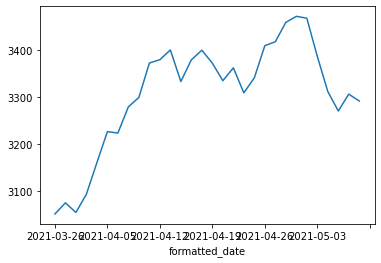

In [66]:
#PLOT LAST 100 DAYS
df['adjclose_AMZN'].iloc[-30:].plot()

In [84]:
# Get 1month ,3mo, 6 mo, 1 year pct change
import yfinance as yf
start = dt.datetime.today()-dt.timedelta(3650)
end = dt.datetime.today()
ticker = "AMZN"


#valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
    
AMZN = yf.download(ticker,start,end,interval='1mo')
AMZN['pct_change_1_mo']= AMZN['Adj Close'].pct_change()
AMZN['pct_change_3_mo']= AMZN['Adj Close'].pct_change(3)
AMZN['pct_change_6_mo']= AMZN['Adj Close'].pct_change(6)
AMZN['pct_change_12_mo']= AMZN['Adj Close'].pct_change(12)



AMZN

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,pct_change_1_mo,pct_change_3_mo,pct_change_6_mo,pct_change_12_mo
Date,,,,,,,,,,
2011-06-01,196.059998,206.250000,181.589996,204.490005,204.490005,95563700,NaN,NaN,NaN,NaN
2011-07-01,205.550003,227.199997,203.610001,222.520004,222.520004,92808500,0.088171,NaN,NaN,NaN
2011-08-01,225.000000,227.449997,177.100006,215.229996,215.229996,155194700,-0.032761,NaN,NaN,NaN
2011-09-01,215.279999,244.000000,204.470001,216.229996,216.229996,143623300,0.004646,0.057411,NaN,NaN
2011-10-01,217.009995,246.710007,196.509995,213.509995,213.509995,159214400,-0.012579,-0.040491,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-02-01,3242.360107,3434.000000,3036.699951,3092.929932,3092.929932,72104600,-0.035328,-0.023709,-0.103748,0.641900
2021-03-01,3127.889893,3182.000000,2881.000000,3094.080078,3094.080078,78045200,0.000372,-0.050001,-0.017356,0.586936
2021-04-01,3117.939941,3554.000000,3115.550049,3467.419922,3467.419922,76822500,0.120663,0.081473,0.142045,0.401544


In [103]:
# Get number of times in a row that there has been positive returns for that month in a row 
#AMZN['pct_change_1_mo2'] = (AMZN['pct_change_1_mo'] > AMZN['pct_change_1_mo'].shift(1) & AMZN['pct_change_1_mo'].shift(1) > 0).astype(int).cumsum()

AMZN['pct_change_1_mo2'] = (AMZN['Adj Close'] > AMZN['Adj Close'].shift(1)).astype(int).cumsum()
AMZN

,Open,High,Low,Close,Adj Close,Volume,pct_change_1_mo,pct_change_3_mo,pct_change_6_mo,pct_change_12_mo,pct_change_1_mo2
Date,,,,,,,,,,,
2011-06-01,196.059998,206.250000,181.589996,204.490005,204.490005,95563700,NaN,NaN,NaN,NaN,0
2011-07-01,205.550003,227.199997,203.610001,222.520004,222.520004,92808500,0.088171,NaN,NaN,NaN,1
2011-08-01,225.000000,227.449997,177.100006,215.229996,215.229996,155194700,-0.032761,NaN,NaN,NaN,1
2011-09-01,215.279999,244.000000,204.470001,216.229996,216.229996,143623300,0.004646,0.057411,NaN,NaN,2
2011-10-01,217.009995,246.710007,196.509995,213.509995,213.509995,159214400,-0.012579,-0.040491,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,3242.360107,3434.000000,3036.699951,3092.929932,3092.929932,72104600,-0.035328,-0.023709,-0.103748,0.641900,70
2021-03-01,3127.889893,3182.000000,2881.000000,3094.080078,3094.080078,78045200,0.000372,-0.050001,-0.017356,0.586936,71
2021-04-01,3117.939941,3554.000000,3115.550049,3467.419922,3467.419922,76822500,0.120663,0.081473,0.142045,0.401544,72


In [142]:

#AMZN['pct_change_1_mo2'] = (AMZN['Adj Close'] > AMZN['Adj Close'].shift(1)).astype(int).cumsum()
AMZN['pct_change_1_mo2'] = np.where(AMZN['Adj Close'] > AMZN['Adj Close'].shift(1),1,0)
AMZN['diff_change'] = AMZN['Adj Close'].diff()
#AMZN['accumulator'] = AMZN.groupby('pct_change_1_mo2').cumcount() + 1
#AMZN['accumulator'] = AMZN['Adj Close'].cumcount()
#y = AMZN['accumulator']
#AMZN['accumulator2'] = y * (y.groupby((y > y.shift(1)).cumsum()).cumcount() + 1)
AMZN

,Open,High,Low,Close,Adj Close,Volume,pct_change_1_mo,pct_change_3_mo,pct_change_6_mo,pct_change_12_mo,pct_change_1_mo2,accumulator,accumulator2,diff_change
Date,,,,,,,,,,,,,,
2011-06-01,196.059998,206.250000,181.589996,204.490005,204.490005,95563700,NaN,NaN,NaN,NaN,0,1,1,NaN
2011-07-01,205.550003,227.199997,203.610001,222.520004,222.520004,92808500,0.088171,NaN,NaN,NaN,1,1,2,18.029999
2011-08-01,225.000000,227.449997,177.100006,215.229996,215.229996,155194700,-0.032761,NaN,NaN,NaN,0,2,2,-7.290009
2011-09-01,215.279999,244.000000,204.470001,216.229996,216.229996,143623300,0.004646,0.057411,NaN,NaN,1,2,4,1.000000
2011-10-01,217.009995,246.710007,196.509995,213.509995,213.509995,159214400,-0.012579,-0.040491,NaN,NaN,0,3,3,-2.720001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,3242.360107,3434.000000,3036.699951,3092.929932,3092.929932,72104600,-0.035328,-0.023709,-0.103748,0.641900,0,47,47,-113.270020
2021-03-01,3127.889893,3182.000000,2881.000000,3094.080078,3094.080078,78045200,0.000372,-0.050001,-0.017356,0.586936,1,71,71,1.150146
2021-04-01,3117.939941,3554.000000,3115.550049,3467.419922,3467.419922,76822500,0.120663,0.081473,0.142045,0.401544,1,72,72,373.339844


In [159]:
a =AMZN['diff_change'] 
for i in range(0,len(a)):
    print(a[i])
    if a[i] > a[i -1]:
        if a[i] > 0:
            print("yes greater than 0 and consecutive")
        else:
            print("not greater and consecutive")
    else:
        print("no")

nan
no
18.029998779296875
no
-7.290008544921875
no
1.0
yes greater than 0 and consecutive
-2.720001220703125
no
-21.220001220703125
no
-19.189987182617188
not greater and consecutive
21.339996337890625
yes greater than 0 and consecutive
-14.75
no
22.819992065429688
yes greater than 0 and consecutive
29.389999389648438
yes greater than 0 and consecutive
-18.989990234375
no
15.44000244140625
yes greater than 0 and consecutive
4.9499969482421875
no
14.970001220703125
yes greater than 0 and consecutive
6.0500030517578125
no
-21.430007934570312
no
19.160003662109375
yes greater than 0 and consecutive
-1.1800079345703125
no
14.6300048828125
yes greater than 0 and consecutive
-1.230010986328125
no
2.220001220703125
yes greater than 0 and consecutive
-12.67999267578125
no
15.3900146484375
yes greater than 0 and consecutive
8.489990234375
no
23.529998779296875
yes greater than 0 and consecutive
-20.239990234375
no
31.660003662109375
yes greater than 0 and consecutive
51.389984130859375
yes grea

In [158]:
a = [0,0,1,1,1,0,0,1,0,1,1]

for i in range(1, len(a)):
    if a[i] == 1:
        a[i] += a[i - 1]
a

[0, 0, 1, 2, 3, 0, 0, 1, 0, 1, 2]

In [134]:
a = [0,0,1,2,1,0,0,1,0,1,1]

for i in range(1, len(a)):
    temp = []
    if a[i] > a[i-1]:
        if a[i-1]=1:
            temp.append(a[i-1])
        
        a[i] += 1 #a[i +1]
a

[0, 0, 3, 2, 1, 0, 0, 3, 0, 3, 1]

# Back Test Strategies

In [ ]:
#minimum suggested volume to trade a stock
# #1 million
# The reason behind this is that day traders need to implement their entry and exit strategies quickly and with ease. 
# For this to be successful, one needs to trade stocks with high daily volume – minimum of 1 million. 
# For swing traders, a lower volume is more attractive – around 100,000 to 500,000 shares within a day.

In [ ]:
#https://seekingalpha.com/article/4176166-magic-formula-lost-sparkle 

In [191]:
df

,date_AMZN,high_AMZN,low_AMZN,open_AMZN,close_AMZN,volume_AMZN,adjclose_AMZN,percent_change_AMZN,MA_5_Day,MA_30_Day,...,ADX,MA_Fast,MA_Slow,MACD,Signal,Volume,On Balance Volume,close_slope,Date,Open
formatted_date,,,,,,,,,,,,,,,,,,,,,
2016-09-15,1473946200,770.87,757.58,762.00,769.69,3034000,769.69,0.0113,764.684,767.741000,...,16.669044,769.026928,766.196285,2.830643,4.583933,3034000,0,0.000000,1473946200,762.00
2016-09-16,1474032600,780.46,771.66,773.28,778.52,5499200,778.52,0.0115,768.360,768.332667,...,16.150476,770.487401,767.109922,3.377479,4.342642,5499200,5499200,0.000000,1474032600,773.28
2016-09-19,1474291800,781.94,771.00,779.97,775.10,2297200,775.10,-0.0044,769.082,768.636667,...,15.816928,771.197032,767.702241,3.494791,4.173072,2297200,3202000,0.000000,1474291800,779.97
2016-09-20,1474378200,781.37,776.00,776.00,780.22,1937200,780.22,0.0066,772.924,769.092000,...,15.507204,772.585181,768.630152,3.955029,4.129463,1937200,5139200,0.000000,1474378200,776.00
2016-09-21,1474464600,790.69,779.01,783.25,789.74,2718600,789.74,0.0122,778.654,769.806333,...,16.124495,775.224384,770.194889,5.029495,4.309470,2718600,7857800,60.056209,1474464600,783.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-03,1620048600,3486.65,3372.70,3484.73,3386.49,5875500,3386.49,-0.0233,3440.230,3281.366000,...,28.250460,3394.392614,3329.059587,65.333027,64.610421,5875500,371606100,-65.550784,1620048600,3484.73
2021-05-04,1620135000,3367.98,3272.13,3356.19,3311.87,5439400,3311.87,-0.0220,3419.118,3288.066000,...,26.243069,3381.696827,3327.786284,53.910543,62.470445,5439400,366166700,-86.355953,1620135000,3356.19
2021-05-05,1620221400,3354.70,3264.36,3338.86,3270.54,3711300,3270.54,-0.0125,3381.526,3292.500667,...,24.483566,3364.595777,3323.545819,41.049958,58.186348,3711300,362455400,-87.525097,1620221400,3338.86


In [235]:
short_window = 30
long_window = 90

# Just grab one column
CrossOver_Strat = df[["adjclose_AMZN"]]

# Short and long moving average.. 
CrossOver_Strat["short_mavg"] = CrossOver_Strat['adjclose_AMZN'].rolling(window= short_window,min_periods=1, center=False).mean()
CrossOver_Strat["long_mavg"] = CrossOver_Strat['adjclose_AMZN'].rolling(window= long_window,min_periods=1, center=False).mean()

#make signals
CrossOver_Strat["signal"]=0
CrossOver_Strat["signal"][short_window:] =np.where(CrossOver_Strat['short_mavg'][short_window:] > CrossOver_Strat['long_mavg'][short_window:],1,0)

CrossOver_Strat["positions"] = CrossOver_Strat["signal"].diff()
CrossOver_Strat.tail(50) # it works

<ipython-input-235-de0f184fd2b3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat["short_mavg"] = CrossOver_Strat['adjclose_AMZN'].rolling(window= short_window,min_periods=1, center=False).mean()
<ipython-input-235-de0f184fd2b3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat["long_mavg"] = CrossOver_Strat['adjclose_AMZN'].rolling(window= long_window,min_periods=1, center=False).mean()
<ipython-input-235-de0f184fd2b3>:12: SettingWithCopyWarning: 
A value is trying to be set 

,adjclose_AMZN,short_mavg,long_mavg,signal,positions
formatted_date,,,,,
2021-02-26,3092.93,3250.837000,3198.826111,1,0.0
2021-03-01,3146.14,3251.459333,3198.147556,1,0.0
2021-03-02,3094.53,3251.135333,3196.786667,1,0.0
2021-03-03,3005.00,3247.276667,3194.787333,1,0.0
2021-03-04,2977.57,3237.749667,3192.578111,1,0.0
2021-03-05,3000.46,3227.532000,3190.312111,1,0.0
2021-03-08,2951.95,3216.189333,3187.477778,1,0.0
2021-03-09,3062.85,3208.484333,3184.994667,1,0.0
2021-03-10,3057.64,3199.534667,3183.826444,1,0.0


In [237]:
# To grab data between 2 dates 

CrossOver_Strat.reset_index( inplace=True)
#CrossOver_Strat.set_index
#CrossOver_Strat.set_index("Date", inplace = True)
# start_date ="2018-09-21"
# end_date= "2019-04-21"

# mask = (CrossOver_Strat['formatted_date'] > start_date) & (CrossOver_Strat['formatted_date'] <= end_date)

# var2 = CrossOver_Strat.loc[mask]
# var2.tail(10)

In [238]:
#CrossOver_Strat.set_index("formatted_date", inplace = True)
CrossOver_Strat

,formatted_date,adjclose_AMZN,short_mavg,long_mavg,signal,positions
0,2016-09-15,769.69,769.690000,769.690000,0,NaN
1,2016-09-16,778.52,774.105000,774.105000,0,0.0
2,2016-09-19,775.10,774.436667,774.436667,0,0.0
3,2016-09-20,780.22,775.882500,775.882500,0,0.0
4,2016-09-21,789.74,778.654000,778.654000,0,0.0
...,...,...,...,...,...,...
1164,2021-05-03,3386.49,3281.366000,3220.889556,1,0.0
1165,2021-05-04,3311.87,3288.066000,3222.060111,1,0.0
1166,2021-05-05,3270.54,3292.500667,3223.007556,1,0.0
1167,2021-05-06,3306.37,3299.810667,3224.492889,1,0.0


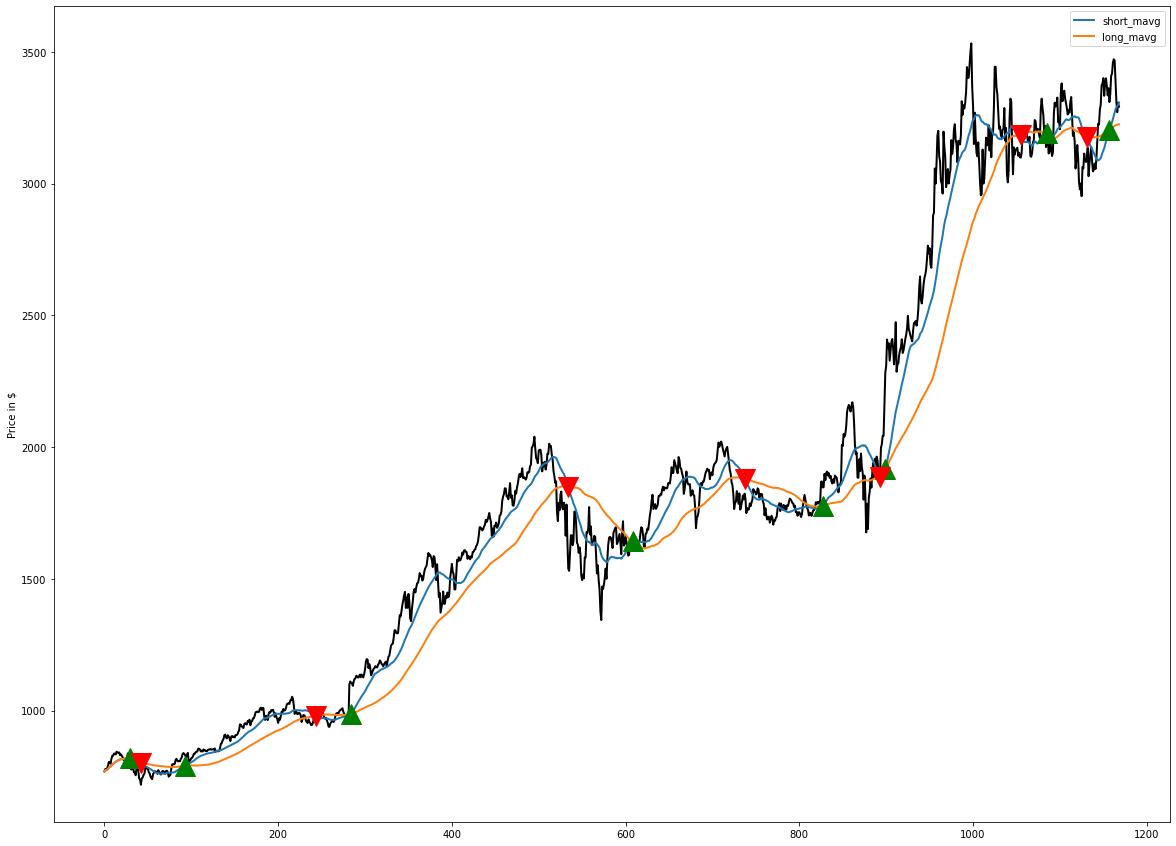

In [239]:
CrossOver_Strat.reset_index( inplace=True)

# Visualize the strategy
fig = plt.figure(figsize = (20,15))

# subplot added 
axl = fig.add_subplot(111,ylabel = 'Price in $')

# Plot the closing price
CrossOver_Strat['adjclose_AMZN'].plot(ax = axl,color = 'black',lw=2.)

# Plot the short and long movijng averages
CrossOver_Strat[['short_mavg','long_mavg']].plot(ax=axl,lw=2.)

#plot the buy signals
axl.plot(CrossOver_Strat.loc[CrossOver_Strat.positions == 1.0].index,
        CrossOver_Strat.short_mavg[CrossOver_Strat.positions==1.0],
        '^',markersize=20,color='g')

axl.plot(CrossOver_Strat.loc[CrossOver_Strat.positions == -1.0].index,
        CrossOver_Strat.short_mavg[CrossOver_Strat.positions== -1.0],
        'v',markersize=20,color='r')

plt.show()

In [240]:
CrossOver_Strat.set_index("formatted_date", inplace = True)

CrossOver_Strat

,adjclose_AMZN,short_mavg,long_mavg,signal,positions
formatted_date,,,,,
2016-09-15,769.69,769.690000,769.690000,0,NaN
2016-09-16,778.52,774.105000,774.105000,0,0.0
2016-09-19,775.10,774.436667,774.436667,0,0.0
2016-09-20,780.22,775.882500,775.882500,0,0.0
2016-09-21,789.74,778.654000,778.654000,0,0.0
...,...,...,...,...,...
2021-05-03,3386.49,3281.366000,3220.889556,1,0.0
2021-05-04,3311.87,3288.066000,3222.060111,1,0.0
2021-05-05,3270.54,3292.500667,3223.007556,1,0.0


In [241]:
# Add initial investment to implement the strategy...

#CrossOver_Strat.set_index("formatted_date", inplace = True)

# Set the initial capital to 100k
initial_captial = 100000

# create datafraem positions??
#positions = pd.DataFrame(index = CrossOver_Strat.index).fillna(0.0)

#buy a 1000 shares
CrossOver_Strat['Position in AMZN'] = 1000 * CrossOver_Strat['signal']

# inital the porfilio with value owned
CrossOver_Strat = CrossOver_Strat.multiply(CrossOver_Strat['adjclose_AMZN'],axis=0)

# # store the difference in the shares owned
# pos_diff = positions.diff()

# portfolio['holdings'] = (positions.multiply(CrossOver_Strat['adjclose_AMZN'],axis=0)).sum(axis=1).cumsum()

# portfolio['cash'] = initial_captial - (pos_diff.multiply(CrossOver_Strat[adjclose_AMZN],axis=0)).sum(axis=1).cumsum()

# portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# portfolio['returns'] = portfolio['total'].pct_change



<ipython-input-241-a644d73791ba>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat['Position in AMZN'] = 1000 * CrossOver_Strat['signal']


In [242]:
CrossOver_Strat

,adjclose_AMZN,short_mavg,long_mavg,signal,positions,Position in AMZN
formatted_date,,,,,,
2016-09-15,5.924227e+05,5.924227e+05,5.924227e+05,0.00,NaN,0.0
2016-09-16,6.060934e+05,6.026562e+05,6.026562e+05,0.00,0.0,0.0
2016-09-19,6.007800e+05,6.002659e+05,6.002659e+05,0.00,0.0,0.0
2016-09-20,6.087432e+05,6.053590e+05,6.053590e+05,0.00,0.0,0.0
2016-09-21,6.236893e+05,6.149342e+05,6.149342e+05,0.00,0.0,0.0
...,...,...,...,...,...,...
2021-05-03,1.146831e+07,1.111231e+07,1.090751e+07,3386.49,0.0,3386490.0
2021-05-04,1.096848e+07,1.088965e+07,1.067104e+07,3311.87,0.0,3311870.0
2021-05-05,1.069643e+07,1.076826e+07,1.054098e+07,3270.54,0.0,3270540.0


In [275]:
short_window = 30
long_window = 90

# Just grab one column
CrossOver_Strat = df[["adjclose_AMZN"]]
CrossOver_Strat['percent_change'] = CrossOver_Strat['adjclose_AMZN'].pct_change()
CrossOver_Strat['percent_change_shift'] = CrossOver_Strat['percent_change'].shift(-1)
CrossOver_Strat['percent_change_shift'] = CrossOver_Strat['percent_change_shift'].fillna(0)

# Short and long moving average.. 
CrossOver_Strat["short_mavg"] = CrossOver_Strat['adjclose_AMZN'].rolling(window= short_window,min_periods=1, center=False).mean()
CrossOver_Strat["long_mavg"] = CrossOver_Strat['adjclose_AMZN'].rolling(window= long_window,min_periods=1, center=False).mean()

#make signals
CrossOver_Strat["signal"]=0
CrossOver_Strat["signal"][short_window:] =np.where(CrossOver_Strat['short_mavg'][short_window:] > CrossOver_Strat['long_mavg'][short_window:],1,0)

CrossOver_Strat["positions"] = CrossOver_Strat["signal"].diff()
CrossOver_Strat["positions"] = CrossOver_Strat["positions"].fillna(0)

CrossOver_Strat


<ipython-input-275-4335bc9bf68c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat['percent_change'] = CrossOver_Strat['adjclose_AMZN'].pct_change()
<ipython-input-275-4335bc9bf68c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat['percent_change_shift'] = CrossOver_Strat['percent_change'].shift(-1)
<ipython-input-275-4335bc9bf68c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,adjclose_AMZN,percent_change,percent_change_shift,short_mavg,long_mavg,signal,positions
formatted_date,,,,,,,
2016-09-15,769.69,NaN,0.011472,769.690000,769.690000,0,0.0
2016-09-16,778.52,0.011472,-0.004393,774.105000,774.105000,0,0.0
2016-09-19,775.10,-0.004393,0.006606,774.436667,774.436667,0,0.0
2016-09-20,780.22,0.006606,0.012202,775.882500,775.882500,0,0.0
2016-09-21,789.74,0.012202,0.018943,778.654000,778.654000,0,0.0
...,...,...,...,...,...,...,...
2021-05-03,3386.49,-0.023340,-0.022035,3281.366000,3220.889556,1,0.0
2021-05-04,3311.87,-0.022035,-0.012479,3288.066000,3222.060111,1,0.0
2021-05-05,3270.54,-0.012479,0.010955,3292.500667,3223.007556,1,0.0


In [261]:
CrossOver_Strat.to_csv("CrossOver_Strat.csv", encoding='utf-8', index=False)

In [276]:
CrossOver_Strat['buy'] = np.where(CrossOver_Strat['signal'] == 1,1000,0)
CrossOver_Strat

<ipython-input-276-1a1a56a582e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat['buy'] = np.where(CrossOver_Strat['signal'] == 1,1000,0)


,adjclose_AMZN,percent_change,percent_change_shift,short_mavg,long_mavg,signal,positions,buy
formatted_date,,,,,,,,
2016-09-15,769.69,NaN,0.011472,769.690000,769.690000,0,0.0,0
2016-09-16,778.52,0.011472,-0.004393,774.105000,774.105000,0,0.0,0
2016-09-19,775.10,-0.004393,0.006606,774.436667,774.436667,0,0.0,0
2016-09-20,780.22,0.006606,0.012202,775.882500,775.882500,0,0.0,0
2016-09-21,789.74,0.012202,0.018943,778.654000,778.654000,0,0.0,0
...,...,...,...,...,...,...,...,...
2021-05-03,3386.49,-0.023340,-0.022035,3281.366000,3220.889556,1,0.0,1000
2021-05-04,3311.87,-0.022035,-0.012479,3288.066000,3222.060111,1,0.0,1000
2021-05-05,3270.54,-0.012479,0.010955,3292.500667,3223.007556,1,0.0,1000


In [278]:
# Normal position without using the strategy.. 
initial_position = 100000
new = [(CrossOver_Strat.percent_change_shift.values[0] * initial_position) + initial_position] # make the first value of new column hold it in variable where we take initial position and multiply by the shifted percent change column to get initial starting value
for i in range(1, len(CrossOver_Strat.index)): # starting at second row of the dataframe column 
    new.append((new[i-1]*CrossOver_Strat.percent_change_shift.values[i]) +new[i-1]) # take new and multiply the first calculated value by the next percent change plus the origional value to get new position value

# Assign the list new to the dataframe column
CrossOver_Strat['CurrentPosition'] = new
CrossOver_Strat['CurrentPosition'] = CrossOver_Strat['CurrentPosition'].round(2) # round the coumn
CrossOver_Strat['Current_Position_Final'] = CrossOver_Strat['CurrentPosition'].round(2).shift(1) # shift it down to make since since shifted percent change up one value
CrossOver_Strat.Current_Position_Final.iloc[0] = 10000  # inject the initial starting amount into the first value of the column.. 
CrossOver_Strat

<ipython-input-278-60adde893ea7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat['CurrentPosition'] = new
<ipython-input-278-60adde893ea7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat['CurrentPosition'] = CrossOver_Strat['CurrentPosition'].round(2) # round the coumn
<ipython-input-278-60adde893ea7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

,adjclose_AMZN,percent_change,percent_change_shift,short_mavg,long_mavg,signal,positions,buy,CurrentPosition,Current_Position_Final
formatted_date,,,,,,,,,,
2016-09-15,769.69,NaN,0.011472,769.690000,769.690000,0,0.0,0,101147.22,10000.00
2016-09-16,778.52,0.011472,-0.004393,774.105000,774.105000,0,0.0,0,100702.88,101147.22
2016-09-19,775.10,-0.004393,0.006606,774.436667,774.436667,0,0.0,0,101368.08,100702.88
2016-09-20,780.22,0.006606,0.012202,775.882500,775.882500,0,0.0,0,102604.94,101368.08
2016-09-21,789.74,0.012202,0.018943,778.654000,778.654000,0,0.0,0,104548.58,102604.94
...,...,...,...,...,...,...,...,...,...,...
2021-05-03,3386.49,-0.023340,-0.022035,3281.366000,3220.889556,1,0.0,1000,430286.22,439981.03
2021-05-04,3311.87,-0.022035,-0.012479,3288.066000,3222.060111,1,0.0,1000,424916.52,430286.22
2021-05-05,3270.54,-0.012479,0.010955,3292.500667,3223.007556,1,0.0,1000,429571.65,424916.52


In [283]:
var = CrossOver_Strat[CrossOver_Strat.positions == 1].first_valid_index()
var

'2016-10-27'

In [282]:
# Now use the strategy where the first time the signal is >0 add the initial position then from there add 1000 if signal is 1 else 0
CrossOver_Strat.head(50)



,adjclose_AMZN,percent_change,percent_change_shift,short_mavg,long_mavg,signal,positions,buy,CurrentPosition,Current_Position_Final
formatted_date,,,,,,,,,,
2016-09-15,769.69,NaN,0.011472,769.690000,769.690000,0,0.0,0,101147.22,10000.00
2016-09-16,778.52,0.011472,-0.004393,774.105000,774.105000,0,0.0,0,100702.88,101147.22
2016-09-19,775.10,-0.004393,0.006606,774.436667,774.436667,0,0.0,0,101368.08,100702.88
2016-09-20,780.22,0.006606,0.012202,775.882500,775.882500,0,0.0,0,102604.94,101368.08
2016-09-21,789.74,0.012202,0.018943,778.654000,778.654000,0,0.0,0,104548.58,102604.94
2016-09-22,804.70,0.018943,0.001305,782.995000,782.995000,0,0.0,0,104685.00,104548.58
2016-09-23,805.75,0.001305,-0.008179,786.245714,786.245714,0,0.0,0,103828.81,104685.00
2016-09-26,799.16,-0.008179,0.021210,787.860000,787.860000,0,0.0,0,106031.00,103828.81
2016-09-27,816.11,0.021210,0.015451,790.998889,790.998889,0,0.0,0,107669.32,106031.00


In [294]:
# Make new column if index is the first time ther is a cross over then add the value in..

#MAKE SURE TO SHIFT THE FINAL OUTCOME COLUMN BY THE RIGHT AMOUNT 

initial_position = 100000
var = CrossOver_Strat[CrossOver_Strat.positions == 1].first_valid_index()
var #'2016-10-27'
CrossOver_Strat["Position_Start"] = np.where(CrossOver_Strat.index == var,initial_position,0)
CrossOver_Strat["Position_plus_buy"] = CrossOver_Strat["buy"] + CrossOver_Strat["Position_Start"]
CrossOver_Strat["Current_Position_Base"] = CrossOver_Strat["Position_plus_buy"].cumsum()
CrossOver_Strat["Current_Position_Pct_Change"] =np.where(CrossOver_Strat['signal'] == 1,CrossOver_Strat["Current_Position_Base"] * CrossOver_Strat["percent_change_shift"],0)
CrossOver_Strat['Current_Position_Final2'] =CrossOver_Strat["Current_Position_Base"] + CrossOver_Strat["Current_Position_Pct_Change"]
CrossOver_Strat['Current_Position_Final3'] =np.where(CrossOver_Strat["signal"] == 0,0,CrossOver_Strat['Current_Position_Final2'])


CrossOver_Strat.head(50)

<ipython-input-294-01ebaab8918c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat["Position_Start"] = np.where(CrossOver_Strat.index == var,initial_position,0)
<ipython-input-294-01ebaab8918c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat["Position_plus_buy"] = CrossOver_Strat["buy"] + CrossOver_Strat["Position_Start"]
<ipython-input-294-01ebaab8918c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

,adjclose_AMZN,percent_change,percent_change_shift,short_mavg,long_mavg,signal,positions,buy,CurrentPosition,Current_Position_Final,Position_Start,Current_new_position,Position_plus_buy,Current_Position,Current_Position_Base,Current_Position_Pct_Change,Current_Position_Final2,Current_Position_Final3
formatted_date,,,,,,,,,,,,,,,,,,
2016-09-15,769.69,NaN,0.011472,769.690000,769.690000,0,0.0,0,101147.22,0.000000,0,0,0,0.000000,0,0.000000,0.000000,0.000000
2016-09-16,778.52,0.011472,-0.004393,774.105000,774.105000,0,0.0,0,100702.88,0.000000,0,0,0,-0.000000,0,0.000000,0.000000,0.000000
2016-09-19,775.10,-0.004393,0.006606,774.436667,774.436667,0,0.0,0,101368.08,0.000000,0,0,0,0.000000,0,0.000000,0.000000,0.000000
2016-09-20,780.22,0.006606,0.012202,775.882500,775.882500,0,0.0,0,102604.94,0.000000,0,0,0,0.000000,0,0.000000,0.000000,0.000000
2016-09-21,789.74,0.012202,0.018943,778.654000,778.654000,0,0.0,0,104548.58,0.000000,0,0,0,0.000000,0,0.000000,0.000000,0.000000
2016-09-22,804.70,0.018943,0.001305,782.995000,782.995000,0,0.0,0,104685.00,0.000000,0,0,0,0.000000,0,0.000000,0.000000,0.000000
2016-09-23,805.75,0.001305,-0.008179,786.245714,786.245714,0,0.0,0,103828.81,0.000000,0,0,0,-0.000000,0,0.000000,0.000000,0.000000
2016-09-26,799.16,-0.008179,0.021210,787.860000,787.860000,0,0.0,0,106031.00,0.000000,0,0,0,0.000000,0,0.000000,0.000000,0.000000
2016-09-27,816.11,0.021210,0.015451,790.998889,790.998889,0,0.0,0,107669.32,0.000000,0,0,0,0.000000,0,0.000000,0.000000,0.000000


In [298]:
CrossOver_Strat2 =CrossOver_Strat
CrossOver_Strat2['Fianl_values'] = CrossOver_Strat2['Current_Position_Final3'].replace(0, np.nan).ffill()
CrossOver_Strat2.tail(50)

<ipython-input-298-d1521f65ae04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CrossOver_Strat2['Fianl_values'] = CrossOver_Strat2['Current_Position_Final3'].replace(0, np.nan).ffill()


,adjclose_AMZN,percent_change,percent_change_shift,short_mavg,long_mavg,signal,positions,buy,CurrentPosition,Current_Position_Final,Position_Start,Current_new_position,Position_plus_buy,Current_Position,Current_Position_Base,Current_Position_Pct_Change,Current_Position_Final2,Current_Position_Final3,Fianl_values
formatted_date,,,,,,,,,,,,,,,,,,,
2021-02-26,3092.93,0.011700,0.017204,3250.837000,3198.826111,1,0.0,1000,408754.17,915483.376604,0,1000,1000,15483.376604,900000,15483.376604,915483.376604,915483.376604,915483.376604
2021-03-01,3146.14,0.017204,-0.016404,3251.459333,3198.147556,1,0.0,1000,402048.88,886219.789965,0,1000,1000,-14780.210035,901000,-14780.210035,886219.789965,886219.789965,886219.789965
2021-03-02,3094.53,-0.016404,-0.028932,3251.135333,3196.786667,1,0.0,1000,390416.92,875903.610564,0,1000,1000,-26096.389436,902000,-26096.389436,875903.610564,875903.610564,875903.610564
2021-03-03,3005.00,-0.028932,-0.009128,3247.276667,3194.787333,1,0.0,1000,386853.15,894757.307820,0,1000,1000,-8242.692180,903000,-8242.692180,894757.307820,894757.307820,894757.307820
2021-03-04,2977.57,-0.009128,0.007687,3237.749667,3192.578111,1,0.0,1000,389827.07,910949.478938,0,1000,1000,6949.478938,904000,6949.478938,910949.478938,910949.478938,910949.478938
2021-03-05,3000.46,0.007687,-0.016168,3227.532000,3190.312111,1,0.0,1000,383524.54,890368.393513,0,1000,1000,-14631.606487,905000,-14631.606487,890368.393513,890368.393513,890368.393513
2021-03-08,2951.95,-0.016168,0.037568,3216.189333,3187.477778,1,0.0,1000,397932.93,940036.958621,0,1000,1000,34036.958621,906000,34036.958621,940036.958621,940036.958621,940036.958621
2021-03-09,3062.85,0.037568,-0.001701,3208.484333,3184.994667,1,0.0,1000,397256.04,905457.165712,0,1000,1000,-1542.834288,907000,-1542.834288,905457.165712,905457.165712,905457.165712
2021-03-10,3057.64,-0.001701,0.018298,3199.534667,3183.826444,1,0.0,1000,404525.20,924614.971023,0,1000,1000,16614.971023,908000,16614.971023,924614.971023,924614.971023,924614.971023
